In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Dataset 1

In [34]:
data = pd.read_csv("data_data_preprocessing/data-preprocessed.csv")

In [35]:
x= data[['x','y','z','t']]
y = data[['class']]

### Parameter Descriptions:
t-Sne mapps the point from a space with higher dimesion to a smaller dimension, by looking at the similarities or distances between points
and mapping with keeping the porpbality that similar points stay together.

1. **`n_components`:**
   - *Description:* The `n_components` parameter is the dimension of the space in which the data is projected.

2. **`n_iter`:**
   - *Description:* The `n_iter` parameter, with a recommended minimum value of 250, specifies the maximum iterations for the optimization process. The default value is 1000.

3. **`perplexity`:**
   - *Description:* The `perplexity` parameter is crucial for transforming distances into probabilities during optimization. It is recommended to experiment with values between 5 and 50. It has to be is less than the number of samples in the dataset.

4. **`random_state`:**
   - *Description:* The `random_state` parameter represents the random number generator to be used, ensuring result reproducibility.

### Additional Parameters:
For additional parameters and their details, please refer to the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

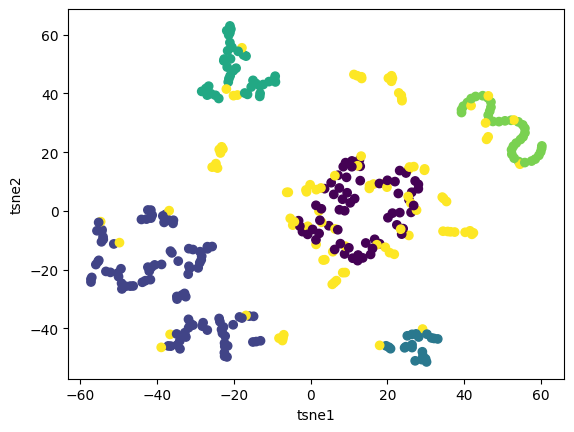

In [36]:
# import tsne from sklearn
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2,perplexity=5, n_iter=1000)

tsne_components = tsne.fit_transform(x)

tsne_df = pd.DataFrame(tsne_components, columns=['tsne1','tsne2'])

tsne_df = pd.concat([tsne_df,y],axis=1)  

plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], c=tsne_df['class'])
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

We plaid with different parameters, but for this method the perplexity parameter is the most important one that makes a change for the mapping. So plot different perplexities.

In [37]:
# import tsne from sklearn
from sklearn.manifold import TSNE
def use_different_perplexity(perplexities,x,y):
    for p in perplexities:
        tsne = TSNE(n_components=2,perplexity=p, n_iter=1000, random_state=0)
        tsne_components = tsne.fit_transform(x)
        tsne_df = pd.DataFrame(tsne_components, columns=['tsne1','tsne2'])
        tsne_df = pd.concat([tsne_df,y],axis=1)  
        plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], c=tsne_df[y.columns[0]])
        plt.xlabel('tsne1')
        plt.ylabel('tsne2')
        plt.title(f"Perplexitie {p}")
        plt.show()



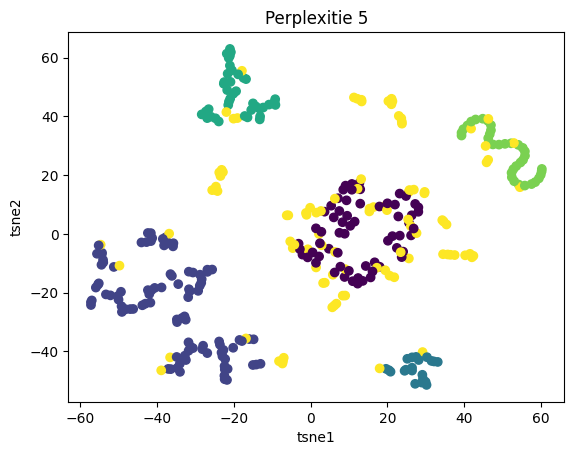

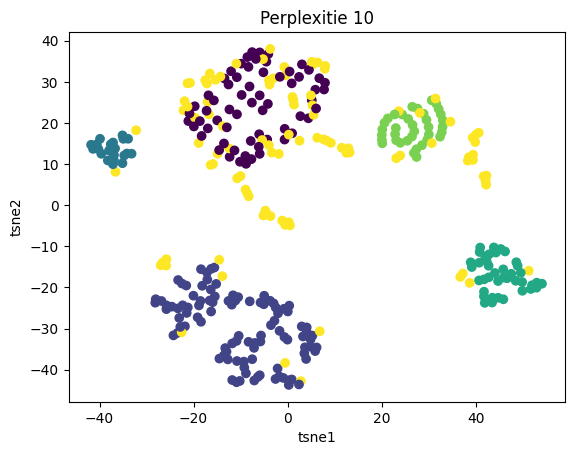

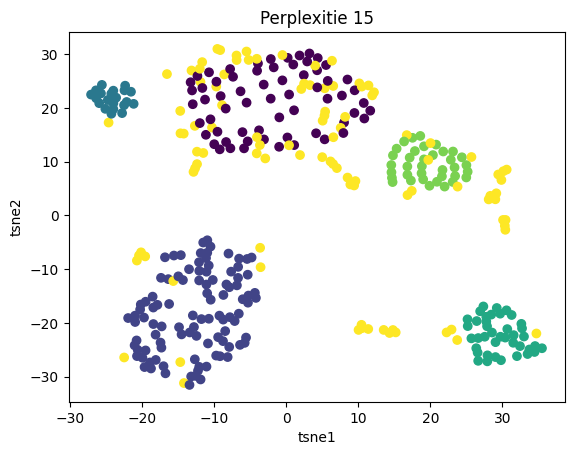

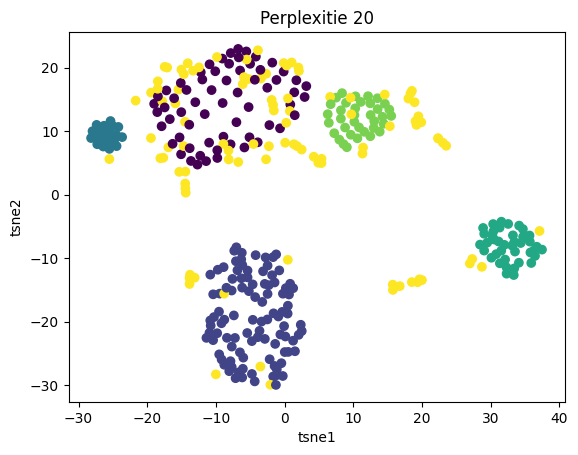

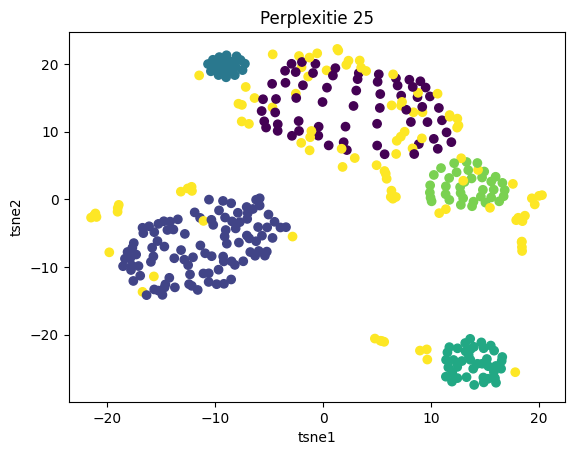

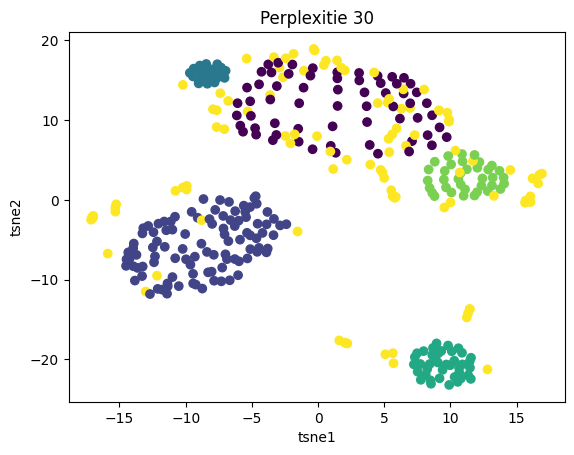

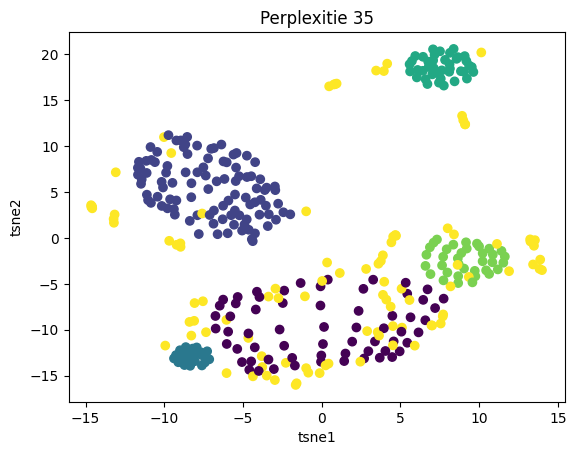

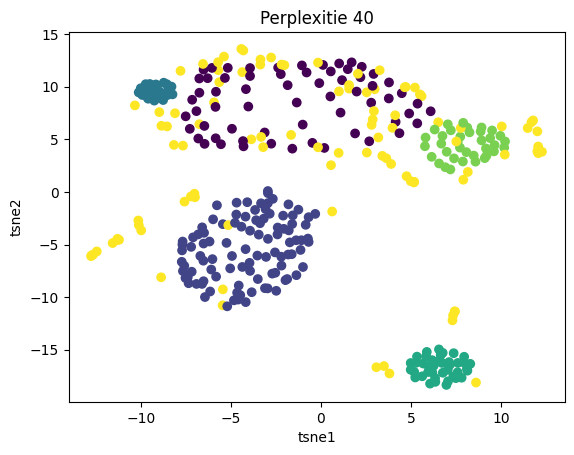

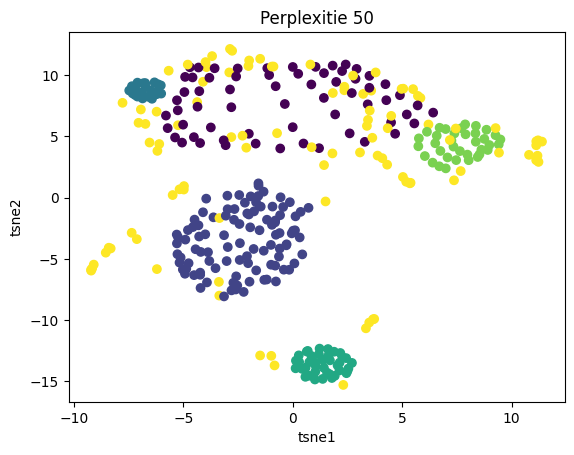

In [38]:
use_different_perplexity([5,10,15,20,25,30,35,40,50],x,y)

We experimented with different perplexity settings [5, 10, 15, 20, 25, 30, 35, 40, 50]. We found that for lower perplexities (5, 10), the points belonging to the same class were clearly separated, and the differences between classes were easily noticeable. This made it easy to distinguish between different clusters. so we would choose perplexitie 10 as the best one for seeing the clusters. However, for higher perplexities (15, 20, 25, 30, 35, 40, 50), the purple and green classes were more closely grouped together, making it harder to identify their clusters without color-coding them. Interestingly, the cluster representation remained mostly unchanged after 20 perplexities.

Another point that can be seen is that the yellow class can not be really classified with the t-Sne

Glass Dataset

In [40]:
# load the dataset
data = pd.read_csv("glas_data_preprocessing/glas-preprocessed.csv")


In [41]:
data.head()

,1,2,3,4,5,6,7,8,9,10
0,0.872868,0.284953,1.000000,-0.692442,-1.127082,-0.671705,-0.145766,0.0,0.0,1
1,-0.249333,0.591817,0.801782,-0.170460,0.102319,-0.026213,-0.793734,0.0,0.0,1
2,-0.721318,0.149933,0.790646,0.190912,0.438787,-0.164533,-0.828949,0.0,0.0,1
3,-0.232831,-0.242853,0.821826,-0.310994,-0.052974,0.112107,-0.519052,0.0,0.0,1
4,-0.312045,-0.169205,0.806236,-0.411375,0.555256,0.081369,-0.624699,0.0,0.0,1


In [42]:
# we split the data, to the features for classification and the class
x= data[['1','2','3','4','5','6','7','8','9']]
y = data[['10']]
y.head()

,10
0,1
1,1
2,1
3,1
4,1


In [43]:
print(y.columns[0])

10


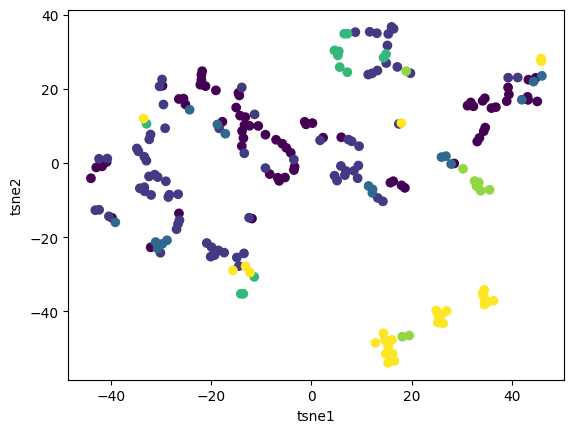

In [44]:
# import tsne from sklearn
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2,perplexity=5, n_iter=1000)

tsne_components = tsne.fit_transform(x)

tsne_df = pd.DataFrame(tsne_components, columns=['tsne1','tsne2'])

tsne_df = pd.concat([tsne_df,y],axis=1)  

plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], c=tsne_df[y.columns[0]])
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

We tried out different settings for different parameters, but the perplexity parameter made the biggest difference in how the data was mapped. To see this more clearly, we plotted the data using different perplexity values. Also when look how t-SNE works than this is most important parameter.

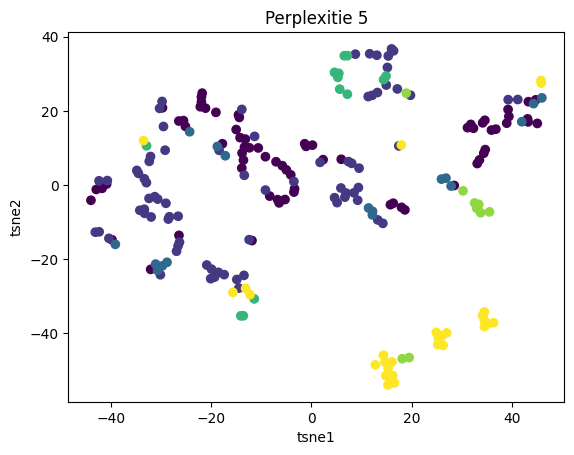

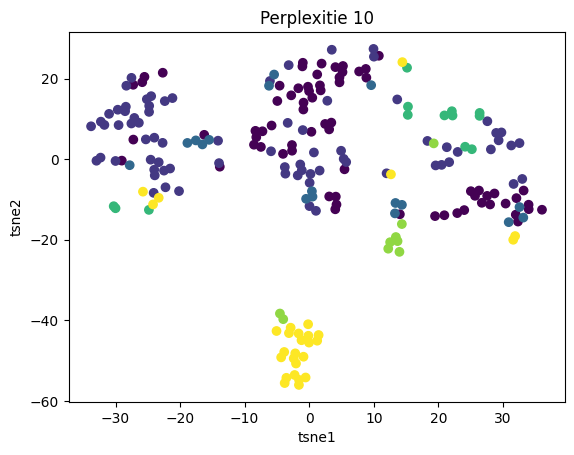

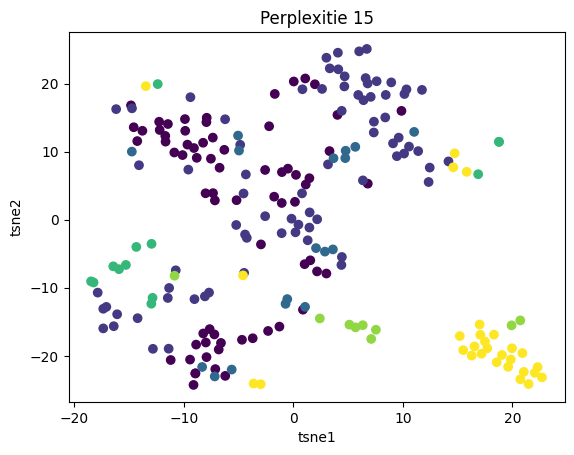

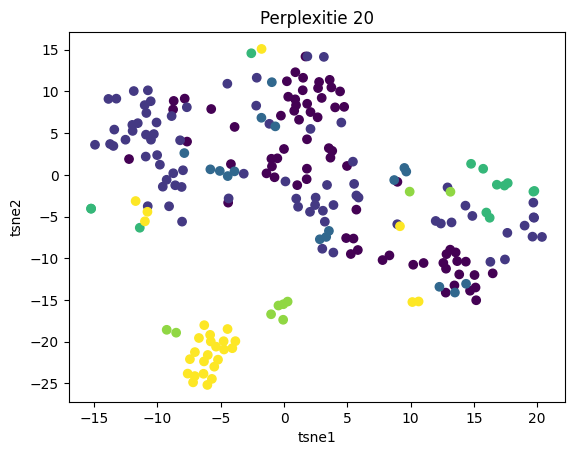

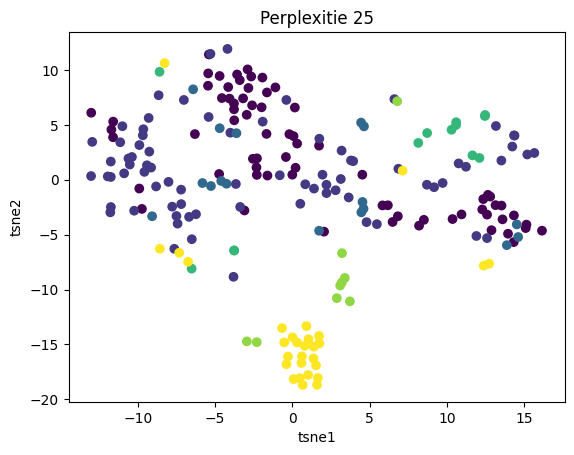

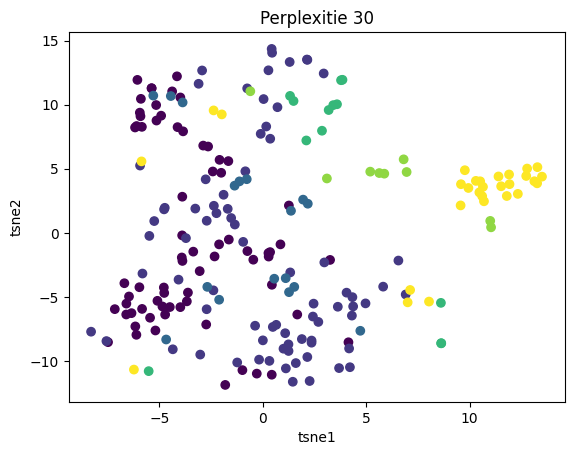

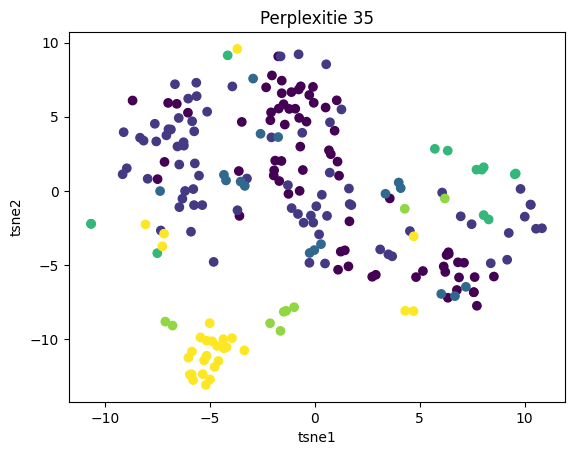

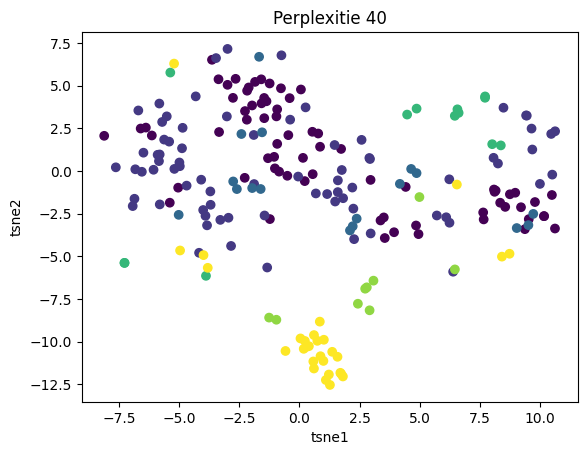

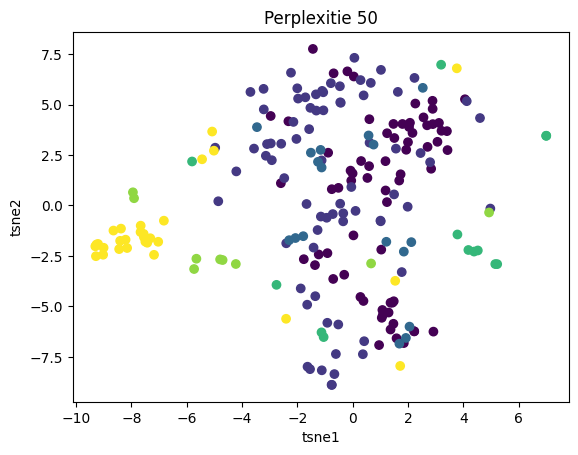

In [45]:
use_different_perplexity([5,10,15,20,25,30,35,40,50],x,y)



We experimented with different perplexity settings [5, 10, 15, 20, 25, 30, 35, 40, 50]. We can see that for the glass data with t-SNE we can not really distinguish between the clusters. For the yellow it is recognizable but for the others there are mixed for all perplities. For the yellow class is better recognizable with perplexity greater than 5. Without color coding we could not recognize the different classes. Interestingly, the cluster representations are not so similar as with the previous data set.

Another point that can be seen is that the yellow class can not be really classified with the t-Sne